In [1]:
##MNIST에서 패션 데이터 가져와서 훈련 데이터와 평가 데이터 나누기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0 ##(48000, 28, 28) -> (48000,28,28,1)변환
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2)) ##폴링 (2,2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
##(2,2)풀링을 했기 때문에 크기는 절반으로 줄어든다 -> 합성곱 층에서 32개의 필터를 사용 = 맵의 깊이 32
##최대 풀링을 통과한 특성 맵의 크기는 (14,14,32)
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) ##드롭아웃 추가
model.add(keras.layers.Dense(10, activation='softmax'))## 클래스 10개를 분류하는 다중 분류 문제이기에 softmax 사용

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          57,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,454 (447.09 KB)

 Trainable params: 114,454 (447.09 KB)

 Non-trainable params: 0 (0.00 B)

모델 파라미터의 개수

첫 번째 합성곱 층은 32개의 필터, 크기 (3,3) 깊이 1, 필터마다 하나의 절편 존재

3 x 3 x 1 x 32 + 32 = 320개의 파라미터

두 번째 합성곱 층 64개 필터, 크기 (3,3) 깊이 32, 필터마다 하나 절편

3 x 3 x 32 x 64 + 64 = 18,496 파라미터

flatten 클래스 (7,7,64) 크기를 1차원으로 펼치면 (3136,) 크기의 배열이 된다.

이를 100개의 뉴련과 연결 하므로
3136 x 100 + 100 = 313,700개

마찬가지로 마지막 출력층의 모델의 개수는
1,010개 이다.

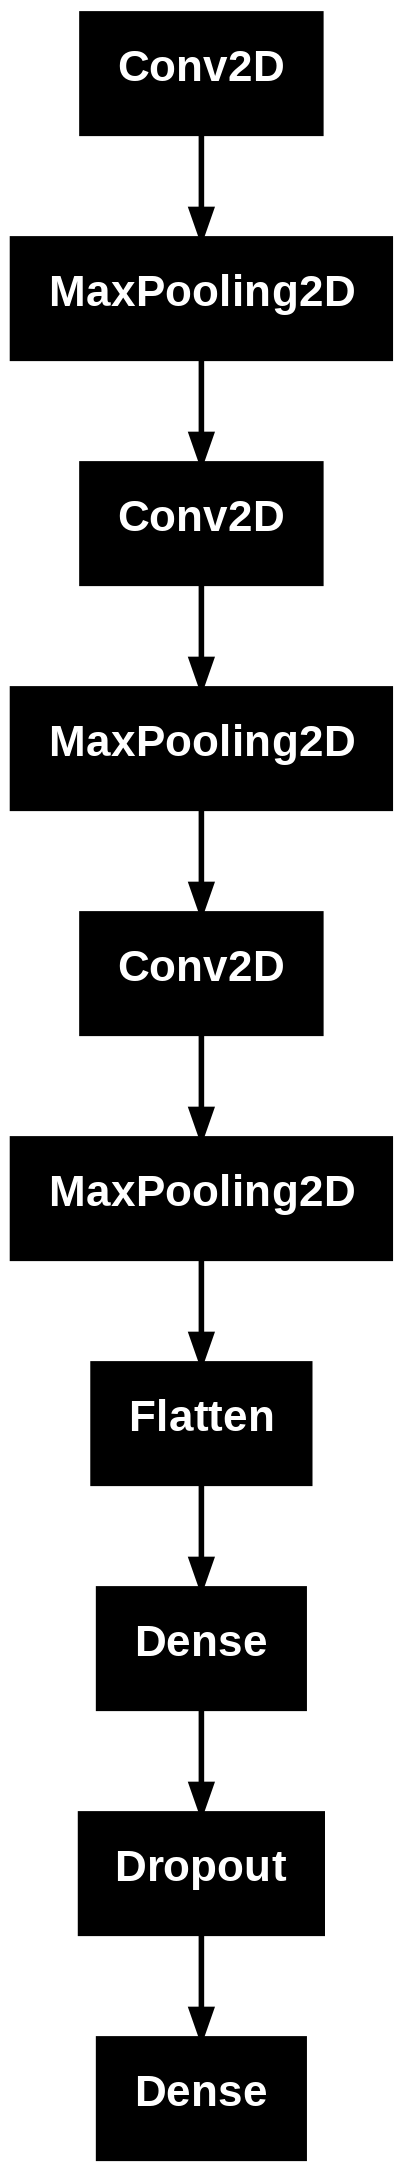

In [8]:
keras.utils.plot_model(model)

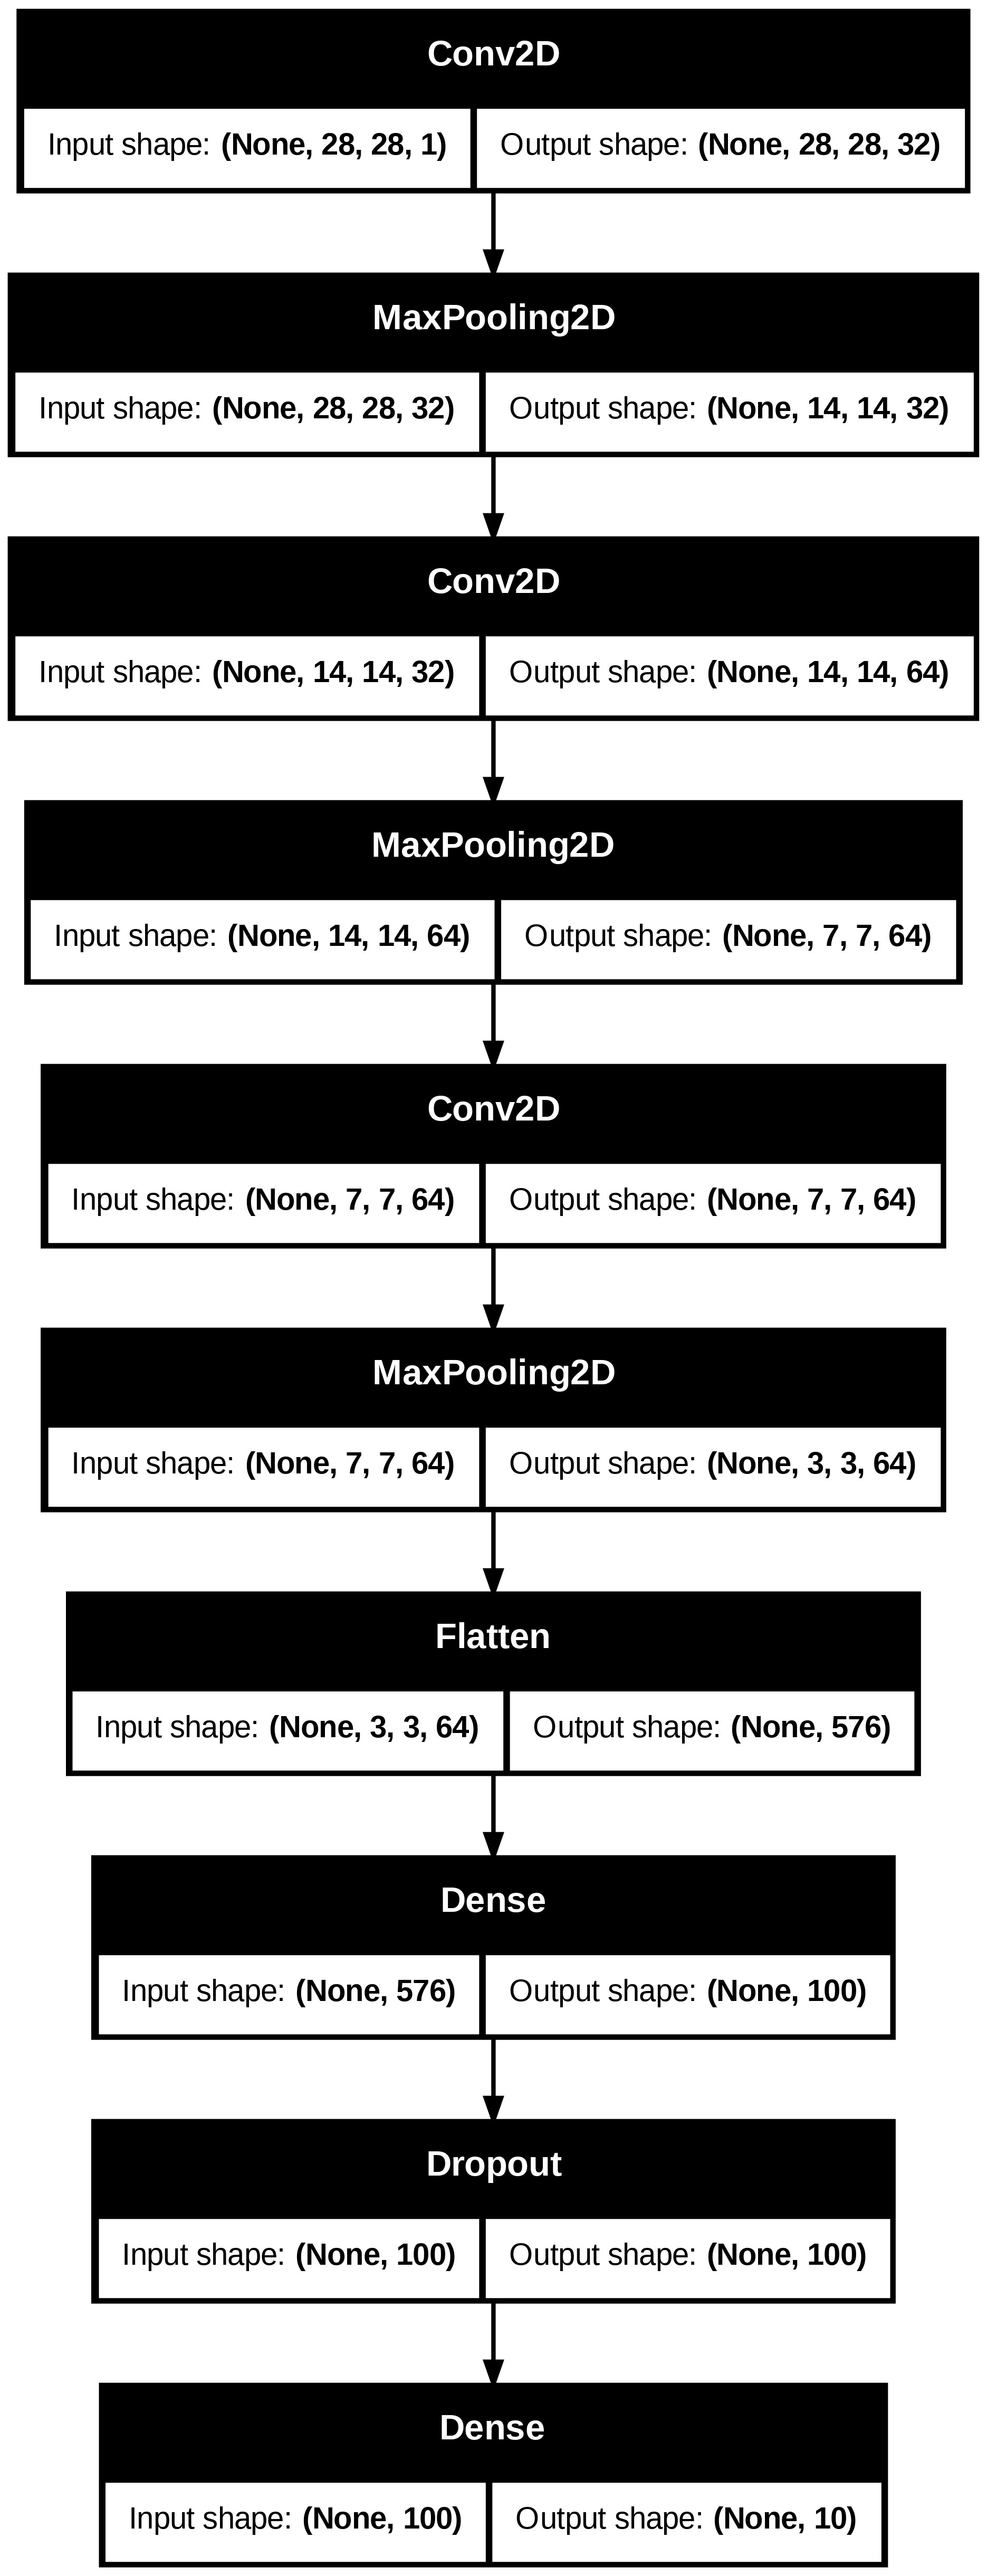

In [9]:
keras.utils.plot_model(model, show_shapes=True,to_file = 'cnn-architecture.png',dpi = 300)

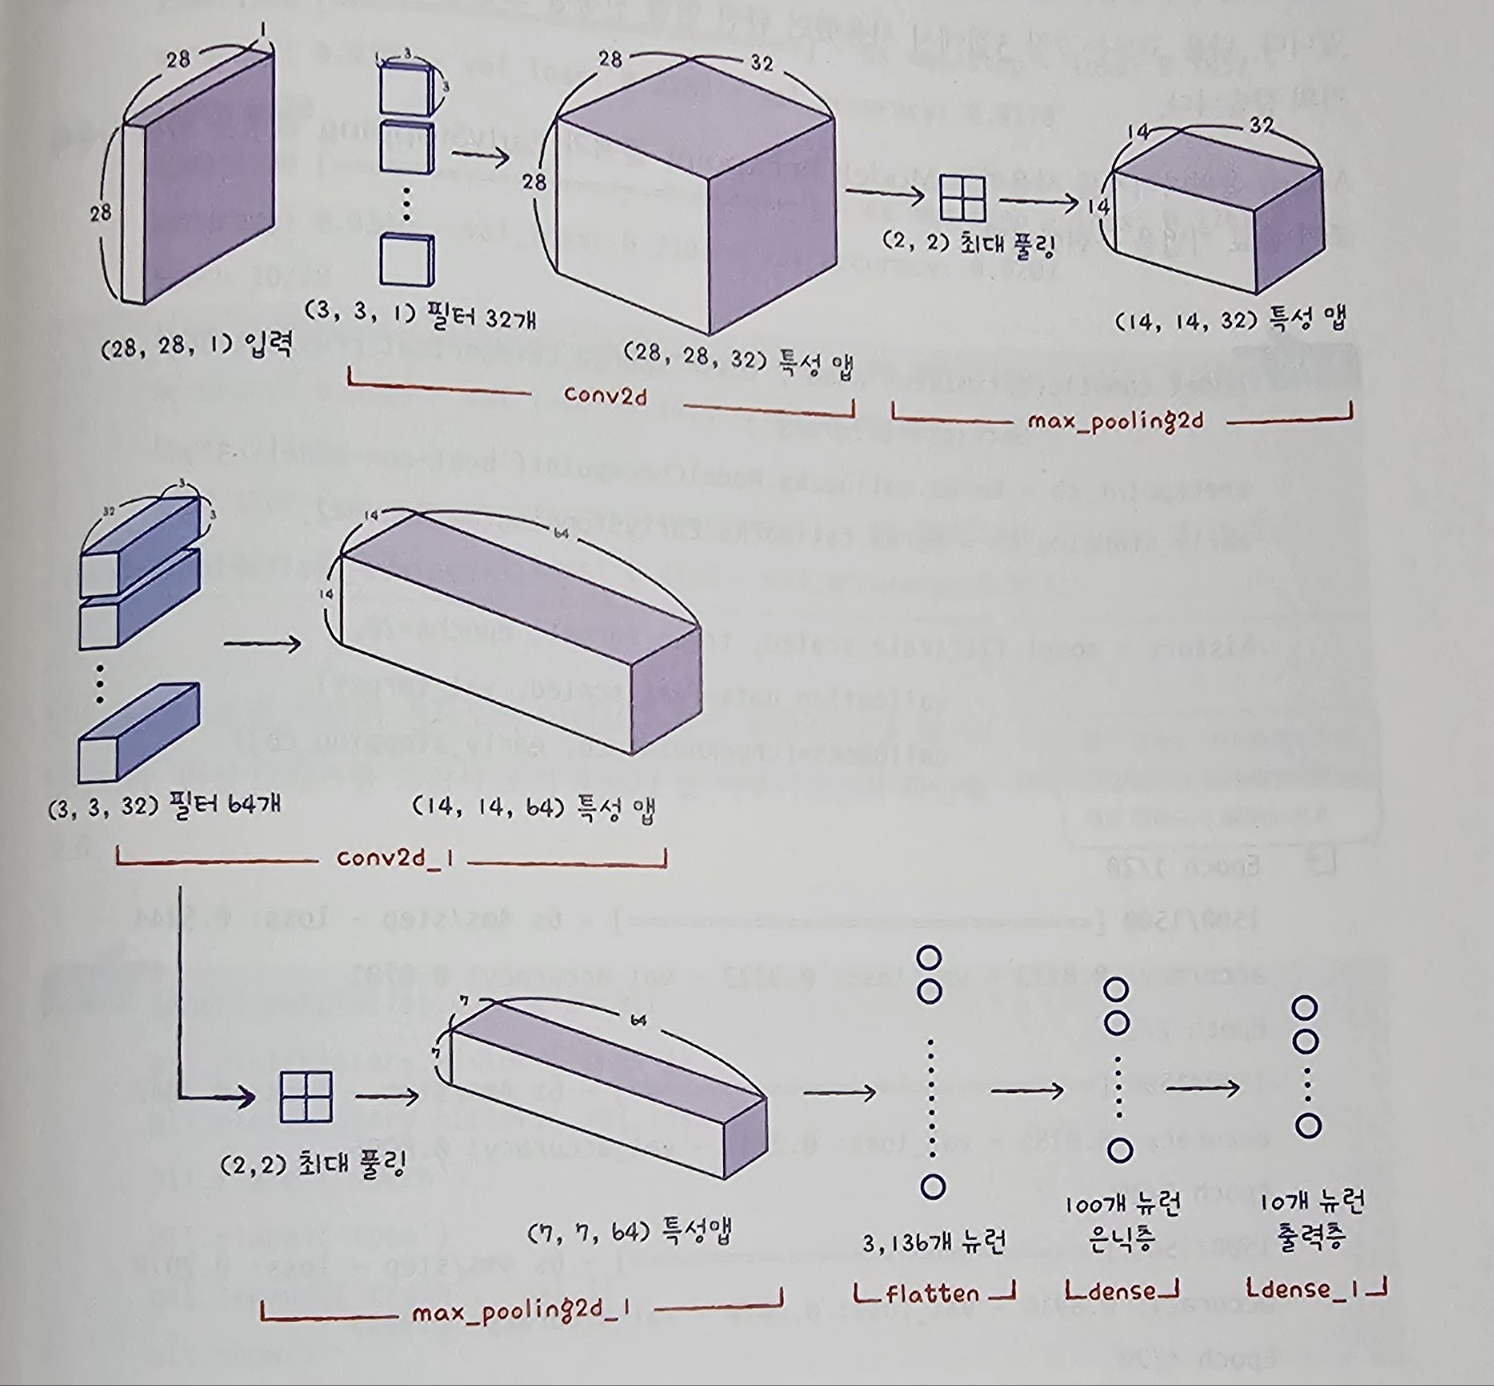



---
**모델  컴파일 및 훈련**


In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.keras")
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled,train_target, epochs = 20, validation_data = (val_scaled,val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.6971 - loss: 0.8250 - val_accuracy: 0.8643 - val_loss: 0.3626
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 140s 57ms/step - accuracy: 0.8590 - loss: 0.3855 - val_accuracy: 0.8829 - val_loss: 0.3118
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 149s 62ms/step - accuracy: 0.8850 - loss: 0.3182 - val_accuracy: 0.8953 - val_loss: 0.2761
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 135s 57ms/step - accuracy: 0.8981 - loss: 0.2835 - val_accuracy: 0.9033 - val_loss: 0.2576
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 145s 59ms/step - accuracy: 0.9046 - loss: 0.2605 - val_accuracy: 0.9043 - val_loss: 0.2518
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 138s 57ms/step - accuracy: 0.9161 - loss: 0.2321 - val_accuracy: 0.9137 - val_loss: 0.2331
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 147s 60ms/step - accuracy: 0.9185 - loss: 0.2211 - val_accuracy: 0.9115 - val_loss: 0.2399
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 90s 60ms/step - accuracy: 0.


*   adam optimizer 사용
*   checkpoint 콜백 + early stopping 콜백 사용



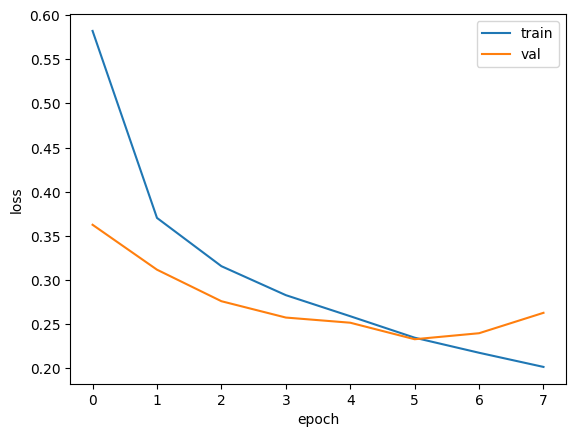

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [14]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9160 - loss: 0.2279


[0.23308514058589935, 0.9137499928474426]

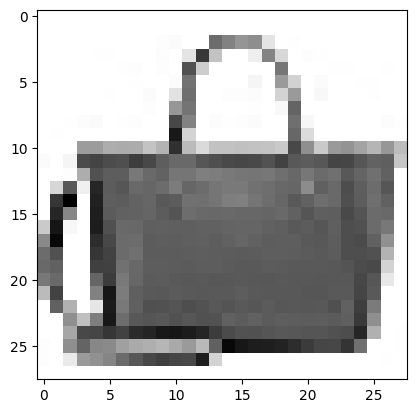

In [15]:
plt.imshow(val_scaled[0].reshape(28,28),cmap = 'gray_r')
plt.show()

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[[2.5635928e-12 5.5122815e-21 1.6519634e-15 3.5383039e-18 1.1797007e-14
  1.4488790e-12 3.8209353e-13 3.0977745e-11 1.0000000e+00 1.5023071e-14]]


아홉번째 값이 1이고 나머지는 0에 가까운 값이다.

e는 지수 표현

5e3 = 5 x 10 ^ 3

5e-3 = 5 x 10 ^ -3

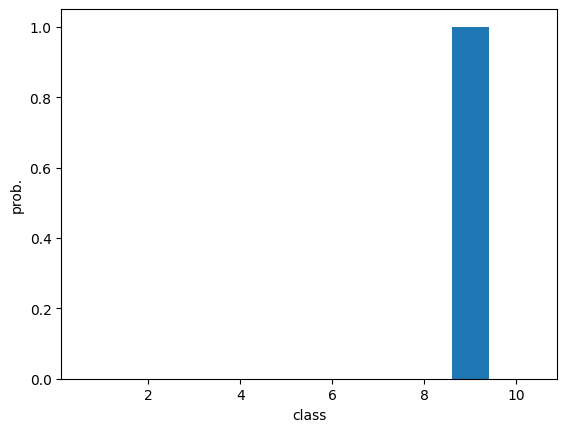

In [17]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [18]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [19]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [22]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [23]:
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9057 - loss: 0.2547


[0.24698615074157715, 0.9086999893188477]